https://archive.ics.uci.edu/ml/machine-learning-databases/00616/

In [111]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [112]:
df = pd.read_csv('power_consumption.csv')

In [113]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [114]:
df = df.sample(frac = 1)

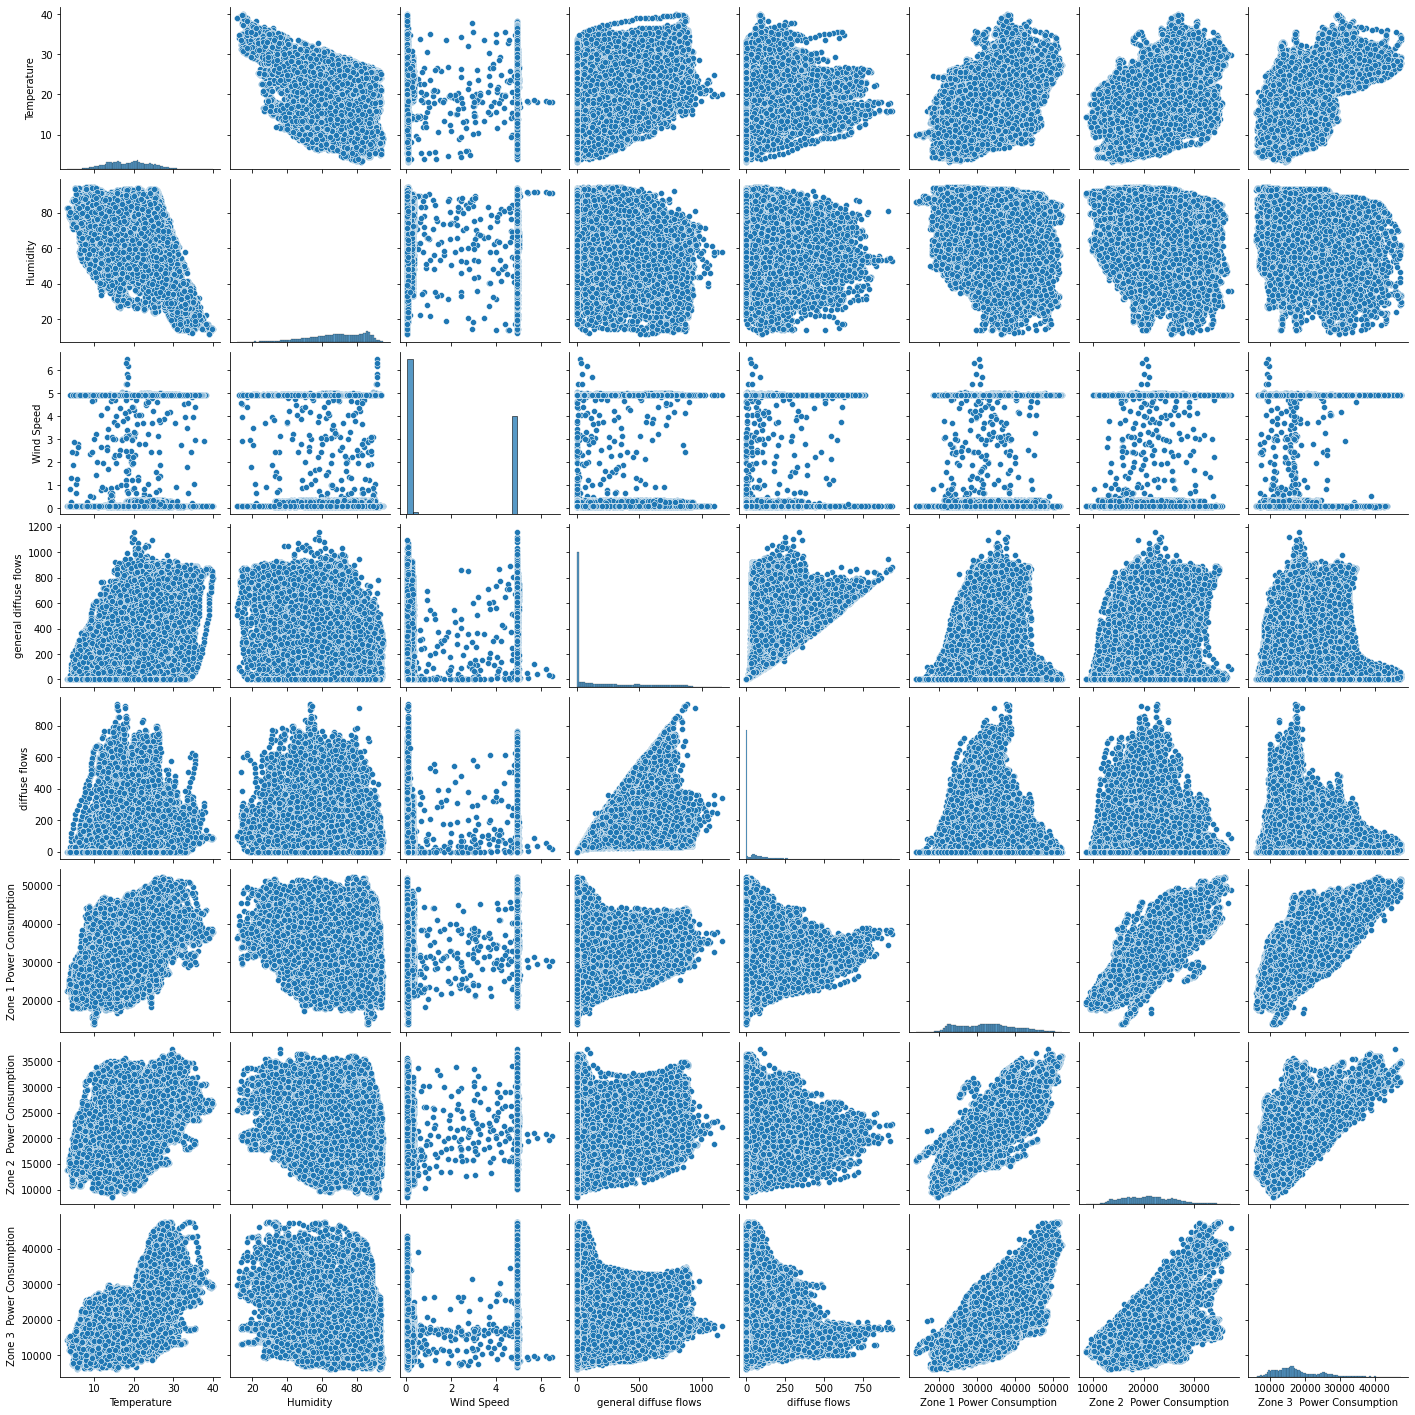

In [115]:
sns.pairplot(df)

<AxesSubplot:>

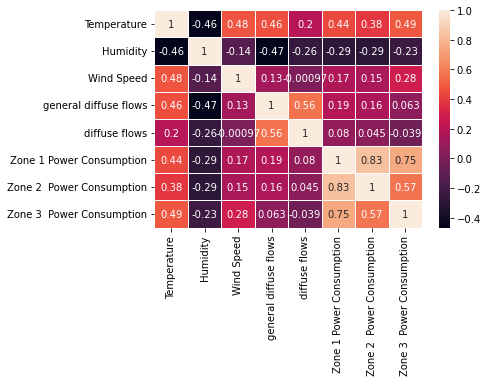

In [116]:
sns.heatmap(df.corr(), linewidth=0.5, annot=True)

In [117]:
x = df[['Temperature', 'Humidity', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']]
y = df['Zone 1 Power Consumption']

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 50)

In [119]:
# Creating a Linear Regression Model
lm = LinearRegression()

# Training the Model created using the 70% data assigned for training
lm.fit(x_train, y_train)
y_line = lm.predict(x_train)

In [120]:
print("Intercept: ", lm.intercept_)

print(lm.coef_)

Intercept:  7561.862545994045
[13.42535673 -6.17444496  0.8185686   0.43336508]


In [121]:
y_pred = lm.predict(x_test)

Text(0, 0.5, 'Predicted values')

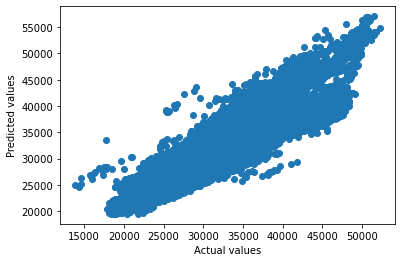

In [122]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

In [123]:
vari = metrics.explained_variance_score(y_test,y_pred)
r2score = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)

print('Variance: ',vari)
print('R2 score : ', r2score)
print('MSE: ',mse )

Variance:  0.808619899906746
R2 score :  0.8086190784781875
MSE:  9722548.428866118
